<a href="https://colab.research.google.com/github/sydoky/Multi-Class-Classification-Using-CNN/blob/main/Multi_Class_Classification_Using_CNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Multi_Class Classification 

# **1. Import and become one with the data**

In [1]:
import zipfile

!wget https://storage.googleapis.com/ztm_tf_course/food_vision/10_food_classes_all_data.zip 


zip_ref = zipfile.ZipFile("10_food_classes_all_data.zip", "r")
zip_ref.extractall()
zip_ref.close()


--2022-02-05 16:02:37--  https://storage.googleapis.com/ztm_tf_course/food_vision/10_food_classes_all_data.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 172.217.0.48, 172.217.1.208, 142.250.73.208, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|172.217.0.48|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 519183241 (495M) [application/zip]
Saving to: ‘10_food_classes_all_data.zip’

10_food_classes_all 100%[===================>] 495.13M   111MB/s    in 5.1s    

2022-02-05 16:02:42 (96.6 MB/s) - ‘10_food_classes_all_data.zip’ saved [519183241/519183241]



In [2]:
import os
for dirpath,dirnames,filenames in os.walk("10_food_classes_all_data"):
  print("There are {} directories and {} images in {}".format(len(dirnames),len(filenames),dirpath))

There are 2 directories and 0 images in 10_food_classes_all_data
There are 10 directories and 0 images in 10_food_classes_all_data/train
There are 0 directories and 750 images in 10_food_classes_all_data/train/grilled_salmon
There are 0 directories and 750 images in 10_food_classes_all_data/train/chicken_curry
There are 0 directories and 750 images in 10_food_classes_all_data/train/hamburger
There are 0 directories and 750 images in 10_food_classes_all_data/train/ramen
There are 0 directories and 750 images in 10_food_classes_all_data/train/ice_cream
There are 0 directories and 750 images in 10_food_classes_all_data/train/sushi
There are 0 directories and 750 images in 10_food_classes_all_data/train/pizza
There are 0 directories and 750 images in 10_food_classes_all_data/train/steak
There are 0 directories and 750 images in 10_food_classes_all_data/train/fried_rice
There are 0 directories and 750 images in 10_food_classes_all_data/train/chicken_wings
There are 10 directories and 0 imag

In [3]:
train_dir="10_food_classes_all_data/train/"
test_dir="10_food_classes_all_data/test/"

# **Get the class names from the subdirectores**

In [4]:
import pathlib
import numpy as np
data_dir=pathlib.Path(train_dir)
class_names=np.array(sorted(item.name for item in data_dir.glob("*")))
print(class_names)

['chicken_curry' 'chicken_wings' 'fried_rice' 'grilled_salmon' 'hamburger'
 'ice_cream' 'pizza' 'ramen' 'steak' 'sushi']


In [5]:
import matplotlib.pyplot as plt #for visualizing
import matplotlib.image as mpimg
import random

def view_random_image(target_dir,target_class):
  target_folder=target_dir+target_class

  random_image=random.sample(os.listdir(target_folder),1)

  img=mpimg.imread(target_folder+"/"+random_image[0])
  plt.imshow(img)
  plt.title(target_class)
  plt.axis("off")

  print("Image shape: {}".format(img.shape))

  return img

Image shape: (512, 512, 3)


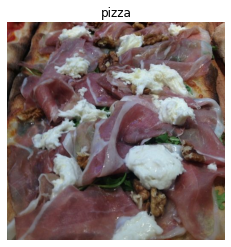

In [6]:
#View a random image from the training dataset

import random
img=view_random_image(target_dir=train_dir,
                      target_class=random.choice(class_names))

# **2. Preprocess the Data(Prepare it fo the model)**

In [7]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
#Rescale the data and we need to create instances

train_datagen=ImageDataGenerator(rescale=1/255.)
test_datagen=ImageDataGenerator(rescale=1/255.)

#Now I need to load data from directories and turn it into batches

train_data=train_datagen.flow_from_directory(train_dir,
                                             target_size=(224,224),
                                             batch_size=33,
                                             class_mode="categorical")

test_data=train_datagen.flow_from_directory(test_dir,
                                             target_size=(224,224),
                                             batch_size=33,
                                             class_mode="categorical")

Found 7500 images belonging to 10 classes.
Found 2500 images belonging to 10 classes.


# **3.Create a Model(Start with a baseline)**

In [8]:
#Now create a basic model
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D,MaxPool2D,Flatten,Dense


#Create model

model_9=Sequential([
                    Conv2D(10,3,activation="relu",input_shape=(224,224,3)),
                    Conv2D(10,3,activation="relu"),
                    MaxPool2D(),
                    Conv2D(10,3,activation="relu"),
                    Conv2D(10,3,activation="relu"),
                    Flatten(),
                    Dense(10,activation="softmax")
])

#Compile the Model
model_9.compile(loss="categorical_crossentropy",
                optimizer=tf.keras.optimizers.Adam(),
                metrics=["accuracy"])

# **4.Fit a Model**

In [9]:
history_9=model_9.fit(train_data,
                      epochs=5,
                      steps_per_epoch=len(train_data),
                      validation_data=test_data,
                      validation_steps=len(test_data))

Epoch 1/5
228/228 [==============================] - 506s 2s/step - loss: 2.1835 - accuracy: 0.2095 - val_loss: 1.9747 - val_accuracy: 0.3076
Epoch 2/5
228/228 [==============================] - 489s 2s/step - loss: 1.7383 - accuracy: 0.4088 - val_loss: 1.9796 - val_accuracy: 0.2912
Epoch 3/5
228/228 [==============================] - 489s 2s/step - loss: 0.7133 - accuracy: 0.7711 - val_loss: 2.7495 - val_accuracy: 0.2400
Epoch 4/5
228/228 [==============================] - 488s 2s/step - loss: 0.1099 - accuracy: 0.9733 - val_loss: 4.4728 - val_accuracy: 0.2312
Epoch 5/5
228/228 [==============================] - 489s 2s/step - loss: 0.0129 - accuracy: 0.9980 - val_loss: 5.9143 - val_accuracy: 0.2288


In [10]:
def plot_loss_curves(history):
  loss=history.history["loss"]
  val_loss=history.history["val_loss"]

  accuracy=history.history["accuracy"]
  val_accuracy=history.history["val_accuracy"]

  epochs=range(len(history.history["loss"]))

  #Plot loss

  plt.plot(epochs,loss,label="training_loss")
  plt.plot(epochs,val_loss,label="val_loss")
  plt.title("Loss")
  plt.xlabel("Epochs")
  plt.legend()

  #Plot accuracy
  plt.figure()
  plt.plot(epochs,accuracy,label="training_accuracy")
  plt.plot(epochs,val_accuracy,label="val_accuracy")
  plt.title("Accuracy")
  plt.xlabel("Epochs")
  plt.legend();


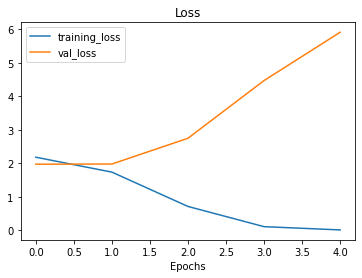

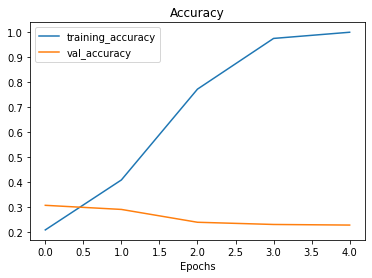

In [11]:
plot_loss_curves(history_9)

#the graph is overfitting. there is a big gap between two lines in both lines. 1 graph we want the line down. 2 graph we want up lines.

In [12]:
#How to solve this overfitting problem 
#To prevent overfitting there are four steps:
#1.Get More Data
#2.Simplify Model
#3. Use Data Augmentation: if a model is able to learn patterns in aumented data, the model may be able to generalize better to unseen/test data
#4. Use Transfer Learning

# **Simplify Model**

In [13]:

model_10=Sequential([
                    Conv2D(10,3,activation="relu",input_shape=(224,224,3)),
                    MaxPool2D(),
                    Conv2D(10,3,activation="relu"),
                    Flatten(),
                    Dense(10,activation="softmax")
])

#Compile the Model
model_10.compile(loss="categorical_crossentropy",
                optimizer=tf.keras.optimizers.Adam(),
                metrics=["accuracy"])

history_10=model_10.fit(train_data,
                      epochs=5,
                      steps_per_epoch=len(train_data),
                      validation_data=test_data,
                      validation_steps=len(test_data))

Epoch 1/5
228/228 [==============================] - 246s 1s/step - loss: 3.4985 - accuracy: 0.1509 - val_loss: 2.2151 - val_accuracy: 0.1876
Epoch 2/5
228/228 [==============================] - 235s 1s/step - loss: 1.8906 - accuracy: 0.3516 - val_loss: 2.2107 - val_accuracy: 0.2264
Epoch 3/5
228/228 [==============================] - 234s 1s/step - loss: 1.0176 - accuracy: 0.6897 - val_loss: 2.4839 - val_accuracy: 0.2320
Epoch 4/5
228/228 [==============================] - 238s 1s/step - loss: 0.3161 - accuracy: 0.9221 - val_loss: 3.3361 - val_accuracy: 0.2292
Epoch 5/5
228/228 [==============================] - 240s 1s/step - loss: 0.0742 - accuracy: 0.9884 - val_loss: 3.9607 - val_accuracy: 0.2228


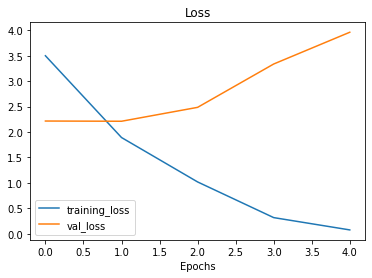

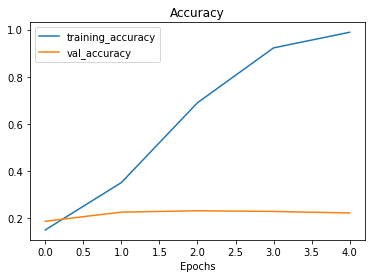

In [18]:
plot_loss_curves(history_10)

# **Data Augmentation**

In [20]:
#Create augmented data generator instance
#Augmentation will increase our images from different angels (increase dataset)
train_datagen_augmented=ImageDataGenerator(rescale=1/255.,
                                           rotation_range=20,
                                           width_shift_range=0.2,
                                           height_shift_range=0.2,
                                           zoom_range=0.2,
                                           horizontal_flip=True)

train_data_augmented=train_datagen_augmented.flow_from_directory(train_dir,
                                                                 target_size=(224,224),
                                                                 batch_size=32,
                                                                 class_mode="categorical")



Found 7500 images belonging to 10 classes.


In [21]:
model_11=tf.keras.models.clone_model(model_10)

model_11.compile(loss="categorical_crossentropy",
                 optimizer=tf.keras.optimizers.Adam(),
                 metrics=["accuracy"])

history_11=model_11.fit(train_data_augmented,
                        epochs=5,
                        steps_per_epoch=len(train_data_augmented),
                        validation_data=test_data,
                        validation_steps=len(test_data))

Epoch 1/5
235/235 [==============================] - 328s 1s/step - loss: 2.8641 - accuracy: 0.1504 - val_loss: 2.1249 - val_accuracy: 0.2252
Epoch 2/5
235/235 [==============================] - 361s 2s/step - loss: 2.1357 - accuracy: 0.2379 - val_loss: 1.9882 - val_accuracy: 0.3020
Epoch 3/5
235/235 [==============================] - 423s 2s/step - loss: 2.0782 - accuracy: 0.2649 - val_loss: 1.9483 - val_accuracy: 0.3116
Epoch 4/5
235/235 [==============================] - 342s 1s/step - loss: 2.0422 - accuracy: 0.2816 - val_loss: 1.8990 - val_accuracy: 0.3312
Epoch 5/5
235/235 [==============================] - 308s 1s/step - loss: 2.0104 - accuracy: 0.2952 - val_loss: 1.9120 - val_accuracy: 0.3484


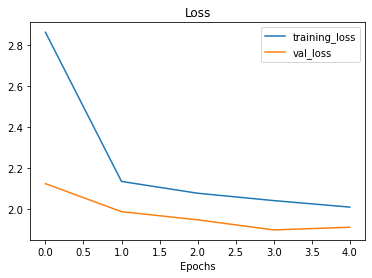

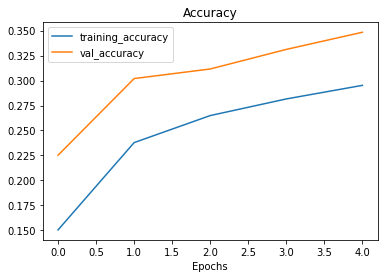

In [22]:
plot_loss_curves(history_11)

# **Next step is to make predictions with our train model**

In [23]:
print(class_names)

['chicken_curry' 'chicken_wings' 'fried_rice' 'grilled_salmon' 'hamburger'
 'ice_cream' 'pizza' 'ramen' 'steak' 'sushi']


In [24]:
#We need to make a prediction model function 
def load_prep_image(filename,img_shape=224):
  #Read the target file
  img=tf.io.read_file(file_name) #io stands for input-output


  #Decode the read file into a tensor & ensure 3 color channels

  img=tf.image.decode_image(img,channels=3)

  img=tf.img.resize(img,size=[img_reshape,img_shape])

  img=img/255.

  return img



In [25]:
def pred_and_plot(model,filename,class_names):
  img=load_prep_image(filename)

  pred=model.predict(tf.expand_dims(img,axis=0))

  if len(pred[0])>1:
    pred_class=class_names[pred.argmax()]
  else:
    pred_class=class_names[int(tf.round(pred)[0[0]])]


    plt.imshow(img)
    plt.title("Prediction {}".format(pred_class))
    plt.axis(False)

In [27]:
#-q is for "quiet"
!wget -q https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/images/03-pizza-dad.jpeg
!wget -q https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/images/03-steak.jpeg
!wget -q https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/images/03-hamburger.jpeg
!wget -q https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/images/03-sushi.jpeg


In [33]:
#Make a prediction using model_11
pred_and_plot(model_11,file_name="03-sushi.jpeg", class_names=class_names)

TypeError: ignored